# CSC-217 Project - AHSAN FAYYAZ

## Project Theme: CLIMATE CHANGE in NYC! Is it real?

### Purpose:
We all have somewhere at some point heard about __climate change__ as the next big threat to our planet & that our Earth's temperatures have risen over past __100-150 years__, and will continue to do so if we do not take any prompt action.
This is happening due to human activity such as heavy emissions of __CarbonDioxide__ and other __greenhouse gases__ into the atmosphere. Sources of C02 are combustion of fuel for cars, industries that depend on coal, electric companies, and etc.

However, to this day, many people (even influential) around the world have shown skepticism towards Global warming.

For my analysis, I will collect various data sets for __average temperatures__ and __average snow fall__ for the New York City over past 100-150 years. Moreover, I have also used datasets of __C02 level__ in the atmosphere for past hundreds of years (my focus will be on the period after 1850 i.e after industrial revolution).

With my data, I will be able to draw valid conclusions to common questions like,

 > - "Whether C02 levels have increased in atmosphere since 1800s? If yes, then how much?"
 > - "Whether temperatures of NYC in summers have increased since 1850s?"
 > - "Whether snowfall in NYC during winters, has become more, or less?"
 > - "Is there a correlation between C02 levels, and average yearly temperatures?"
 > - "Do we actually see a relationship between C02 emissions, and extreme weather conditions?"
 
 Also there will be answer to some more precise relationships.


#### Next cell imports all the libraries from python that will be used to pull, extract, clean and visualize my data as I tell the story

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math


### Let's begin exploring the data..


Dataset #1: __Temperatures(mean) in the New York City__

- This the dataset for average temperatures of New York City from year 1869 - 2017

In [12]:
mean_temp = pd.read_csv('/home/ahsan/Spring2019/csc217/Project/Temperature_data/Full_temp.csv',header=0)
mean_temp.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,1869,35.1,34.5,34.8,49.2,57.7,69.3,72.8,71.8,65.6,50.9,40.3,34.7,51.4
1,1870,37.5,31.3,34.1,50.7,60.9,72.9,76.6,75.3,67.6,56.7,45.5,34.1,53.6
2,1871,28.3,30.2,44.2,52.0,60.4,68.2,72.3,73.6,60.8,55.6,38.8,29.2,51.1
3,1872,28.8,29.9,30.5,49.4,61.5,71.2,77.5,75.6,66.4,53.2,41.0,26.7,51.0
4,1873,28.6,29.5,35.7,46.7,58.8,70.3,75.4,72.0,65.4,55.8,37.0,36.5,51.0


### Visualize this data

So let's have an idea how the temperatures are spread for the month of __JULY__ in the NYC

Why pick July? July is considered the hottest month

Plotting the histogram for __average monthly temperatures__ for the month of __JULY__ from the period 1869 - 2017

Text(0.5, 0.92, 'Temperature in NYC during month of JULY from 1869-2017')

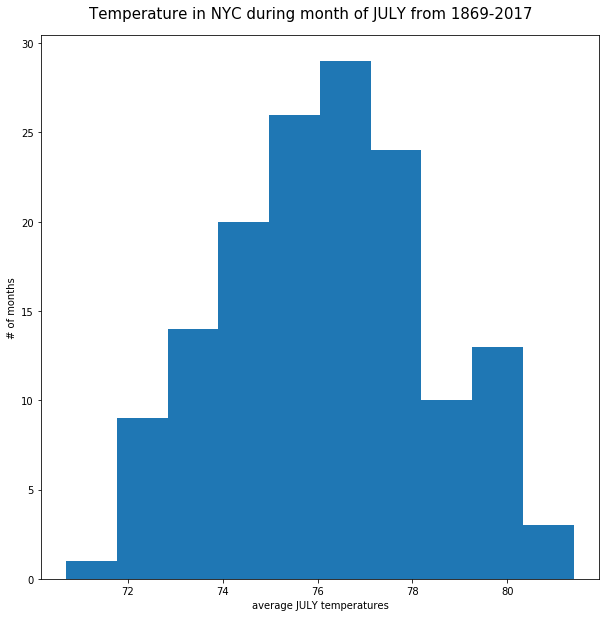

In [18]:
fig = plt.figure(figsize=(10,10))
plt.hist(mean_temp['JUL'])
plt.xlabel("average JULY temperatures")
plt.ylabel("# of months")
fig.suptitle("Temperature in NYC during month of JULY from 1869-2017", fontsize=15, y=0.92)

### Observation:
- The spread looks like it is symmetric
- The guess for average temperatures would be somewhere around __77__ degrees Fahrenheit
- The __lowest__ mean temperatures are not less than __68-70__F
- Similarly, by looking the highest mean temperatures are approximately __80-84__ Fahren height


However, this alone isn't enough to draw any valid conclusion. Let's do more than this

### A better comparison

Now I will divide my data set into two equal periods of 50 years each

- First Period == 1869 - 1919
- Second Period == 1967 - 2017

This will help us compare the two time periods and draw valid conclusions

In [19]:
first_temp_period = mean_temp[mean_temp['YEAR'] <= 1919]
first_temp_period.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,1869,35.1,34.5,34.8,49.2,57.7,69.3,72.8,71.8,65.6,50.9,40.3,34.7,51.4
1,1870,37.5,31.3,34.1,50.7,60.9,72.9,76.6,75.3,67.6,56.7,45.5,34.1,53.6
2,1871,28.3,30.2,44.2,52.0,60.4,68.2,72.3,73.6,60.8,55.6,38.8,29.2,51.1
3,1872,28.8,29.9,30.5,49.4,61.5,71.2,77.5,75.6,66.4,53.2,41.0,26.7,51.0
4,1873,28.6,29.5,35.7,46.7,58.8,70.3,75.4,72.0,65.4,55.8,37.0,36.5,51.0


In [21]:
second_temp_period = mean_temp[mean_temp['YEAR'] >= 1967]
second_temp_period.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
98,1967,37.4,29.2,37.6,49.6,55.2,72.8,75.3,73.9,66.7,57.2,42.5,38.2,53.0
99,1968,26.7,28.9,43.3,55.0,59.6,69.7,77.3,76.0,70.6,60.5,46.9,34.3,54.1
100,1969,31.8,32.6,40.1,55.9,65.3,73.1,74.8,77.4,69.0,57.7,46.4,33.4,54.8
101,1970,25.1,33.0,38.7,52.1,64.0,70.9,77.1,77.6,70.8,58.9,48.5,34.4,54.3
102,1971,27.0,35.1,40.1,50.8,61.4,74.2,77.8,75.9,71.6,62.7,45.1,40.8,55.2


### Since now there are two data sets, let's draw a comparison between them

Let's compare the central tendency and visualize both data sets using histograms, swarm plots, boxplots

#### For Ease:

For Dataset I = First Period = 1869 - 1919

For Dataset II = Second Period = 1967 - 2017

#### Some key notes: 

- Blue -> First time period (1869 - 1919)
- Orange  -> Second time period (1967 - 2018)

Text(0.5, 0.92, 'Temperature in NYC during month of JULY since 1869 -1919 and 1967-2017')

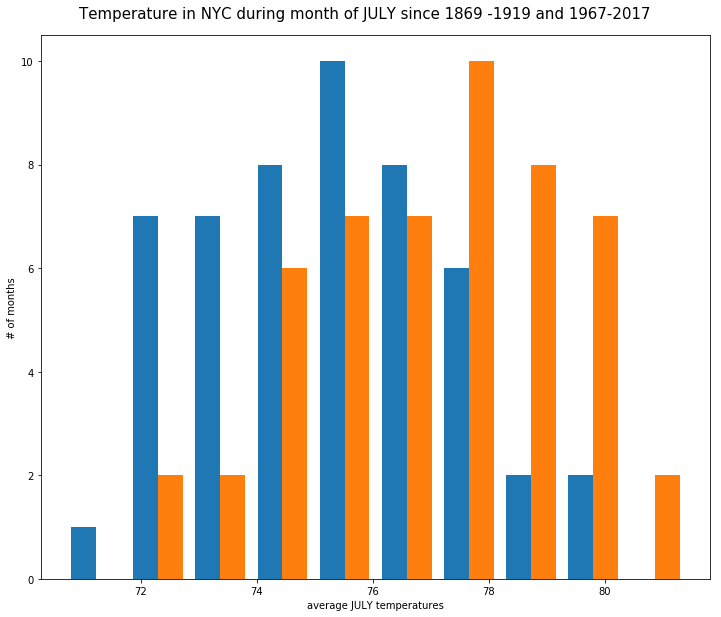

In [23]:
fig2 = plt.figure(figsize=(12,10))
plt.hist([first_temp_period['JUL'], second_temp_period['JUL']])
plt.xlabel("average JULY temperatures")
plt.ylabel("# of months")
fig2.suptitle("Temperature in NYC during month of JULY since 1869 -1919 and 1967-2017", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Difference of Temperatures in First Period vs Second Period')

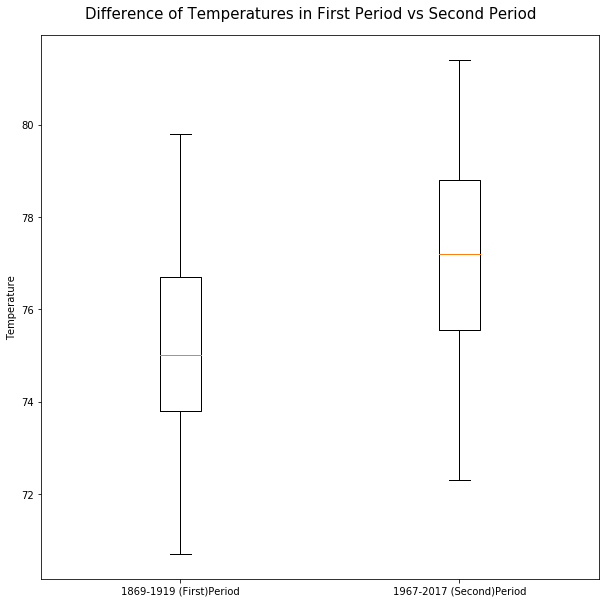

In [25]:
fig3 = plt.figure(figsize=(10,10))
plt.boxplot([first_temp_period['JUL'],second_temp_period['JUL']])
            
plt.xticks([1,2], ["1869-1919 (First)Period", "1967-2017 (Second)Period"])
plt.ylabel("Temperature")
fig3.suptitle("Difference of Temperatures in First Period vs Second Period", fontsize=15, y=0.92)

#### Mean

In [26]:
print("Mean for the first period (1869-1919) =" ,first_temp_period['JUL'].mean())
print("Mean for the second period (1967-2017) =" ,second_temp_period['JUL'].mean())

Mean for the first period (1869-1919) = 75.23725490196077
Mean for the second period (1967-2017) = 77.07058823529414


#### Maximum

In [27]:
print("Max for the first period (1869-1919) =" ,first_temp_period['JUL'].max())
print("Max for the second period (1967-2017) =" ,second_temp_period['JUL'].max())

Max for the first period (1869-1919) = 79.8
Max for the second period (1967-2017) = 81.4


#### Range

In [29]:
print("Range for the first period (1869-1919) =" ,first_temp_period['JUL'].max() - first_temp_period['JUL'].min())
print("Range for the second period (1967-2017) =" ,second_temp_period['JUL'].max() - second_temp_period['JUL'].min())

Range for the first period (1869-1919) = 9.099999999999994
Range for the second period (1967-2017) = 9.100000000000009


#### Interquartile Range

In [37]:
first_interquartile = first_temp_period['JUL'].quantile(q=0.75) - first_temp_period['JUL'].quantile(q=0.25)
second_interquartile = second_temp_period['JUL'].quantile(q=0.75) - second_temp_period['JUL'].quantile(q=0.25)
print("Interquartile for first period  =", first_interquartile)
print("Interquartile for Second period =", second_interquartile)

Interquartile for first period  = 2.8999999999999773
Interquartile for Second period = 3.25


In [44]:
first_var = first_temp_period['JUL'].var()
second_var = second_temp_period['JUL'].var()
print("Variance for first period", first_var)
print("Variance for second period", second_var)

Variance for first period 4.1447843137254905
Variance for second period 4.806117647058824


### Obervations:

From the boxplot and histogram above:
- The average temperatures in second period(1968-2018) are higher than the first(1869-1919)
- 


----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------

## Our next data set is for the snowfall during months of January

Dataset __#2__: __Monthly and Annual Snow__ in the New York City

- This the dataset for snowfall recorded in New York City from year 1869 - 2018

### Purpose of this dataset

It is often claimed that extreme weather is linked to global warming. As we have already seen a rise in average mean temperatures, we are interested to know the correspondence of extreme weather (more snowfall, which years, their count etc)

In [ ]:
snow_fall = pd.read_csv('/home/ahsan/Spring2019/csc217/Project/Snowfall_data/Snow_Full.csv',header=0)
snow_fall.head()

In [ ]:
plt.hist(snow_fall['JAN'])

### Observation:
The histogram is skewed left. Most of the January months have received around 5-10 inches of snow.


### MEDIAN SNOW

In [ ]:
mean_snow_jan = snow_fall['JAN'].median()
print("The mean snow for the month of january is =", mean_snow_jan, "inch")

### A better comparison

Now I will divide my data set into two equal periods of 50 years each

- First Period == 1869 - 1919
- Second Period == 1968 - 2018

This will help us compare the two time periods and draw valid conclusions

In [ ]:
first_snow_period = snow_fall[snow_fall['YEAR(JAN)'] <= 1919]
first_snow_period.head()

In [ ]:
mean_first_snow_jan = first_snow_period['JAN'].median()
print("The median snow for the FIRST PERIOD in month of january is =", mean_first_snow_jan, "inch")

In [ ]:
total_first_snow_jan = first_snow_period['JAN'].sum()
print("The TOTAL snow for the FIRST PERIOD in month of january is =", total_first_snow_jan, "inch")

In [ ]:
second_snow_period = snow_fall[snow_fall['YEAR(JAN)'] >= 1960]
second_snow_period.head()

In [ ]:
median_second_snow_jan = second_snow_period['JAN'].median()
print("The median snow for the SECOND PERIOD in month of january is =", median_second_snow_jan, "inch")

In [ ]:
total_second_snow_jan = second_snow_period['JAN'].sum()
print("The TOTAL snow for the SECOND PERIOD in month of january is =", total_second_snow_jan, "inch")

### Since now there are two data sets, let's draw a comparison between them

Let's compare the central tendency and visualize both data sets using histograms, swarm plots, boxplots

#### For Dataset I
Period 1869 - 1919

#### For Dataset II
Period 1968 - 2018

In [ ]:
plt.figure(figsize=(11,6))
plt.hist([first_snow_period['JAN'], second_snow_period['JAN']])

### Some key notes: 

- Blue    == First time period (1869 - 1919)
- Orange  == Second time period (1968 - 2018)

### Obervations:

- There is not much difference we can conclude at this moment
- It is evident that the average temperatures in second period (1968 - 2018) also include months of January where the snowfall has crossed 30inch, whereas the first period(1869 - 1919) has highest around 20inch

For exact numbers:
Find mean, median, mode and range using the functions

### Comparison of Mode for extreme weather

In [ ]:
print("Mode for the first period (1869-1919) =" ,first_snow_period['JAN'].max())
print("Mode for the second period (1968-2018) =" ,second_snow_period['JAN'].max())

Further more, we would like to see how many days in our first data set and second data set had snow more than 15 inches

### No. of January months when it snowed more than median(from year 1869 - 2018) i.e 6.4 inches

In [ ]:
new_first = first_snow_period[first_snow_period['JAN'] > 6.4]
new_first['JAN'].count()

In [ ]:
new_second = second_snow_period[second_snow_period['JAN'] > 6.4]
new_second['JAN'].count()

#### Conclude:
Second period has more days where it snowed more than 6.4 inches
#### Here is a visualization to see the difference.

In [ ]:
plt.plot(first_snow_period['JAN'])
plt.plot(second_snow_period['JAN'])
plt.legend()

### Final Analysis:
We can clearly conclude that there is more extreme weather in the last second period(i.e last 50 years) as compared to the first time period. Therefore, rising temperatures could be a reason why we face extreme snowy days like never before.

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------

### Our next data set is for the Carbondioxide levels from the year 0 AD - 2018

Dataset __#3__: __C02 levels in the atmosphere__

- This the dataset for Carbondioxide levels since the year 0 A.D to present

In [ ]:
total_c02_data = pd.read_csv('/home/ahsan/Spring2019/csc217/Project/C02_data/mole_fraction_c02_since_year_0.csv',header=0)

### However
#### We are only interested in data from 1800 - 2014 for this dataset

### Dataset contains 3 columns
 - Global 
 - Northern Hemisphere
 - Southern Hemisphere
 
 We will focus on __Northern__

In [ ]:
c02_data = total_c02_data[total_c02_data['year'] >= 1800]
c02_data

### Before anything let's have a general look of how the C02 levels have changed over the past 2000+ years

In [ ]:
plt.plot(total_c02_data['data_mean_global'])
plt.plot(total_c02_data['data_mean_nh'])
plt.plot(total_c02_data['data_mean_sh'])
plt.legend()

### For the years after 1800

In [ ]:
plt.plot(c02_data['data_mean_global'])
plt.plot(c02_data['data_mean_nh'])
plt.plot(c02_data['data_mean_sh'])
plt.legend()

#### Observation:
A steep curve is seen after the years 1800